"""
Fashion MNIST CNN Comparison: Keras vs PyTorch
This script builds and trains the same CNN architecture using both frameworks
"""

In [8]:
# ============================================================================
# IMPORTS
# ============================================================================
# Keras/TensorFlow imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
from torchvision import transforms

# Common imports
import numpy as np
import matplotlib.pyplot as plt
import time

print("=" * 80)
print("FASHION MNIST CNN: KERAS vs PYTORCH COMPARISON")
print("=" * 80)

FASHION MNIST CNN: KERAS vs PYTORCH COMPARISON


In [9]:
# ============================================================================
# LOAD DATA
# ============================================================================
print("\n[1] Loading Fashion MNIST dataset...")

# Load for Keras
(x_train_keras, y_train_keras), (x_test_keras, y_test_keras) = keras.datasets.fashion_mnist.load_data()
x_train_keras = x_train_keras.astype('float32') / 255.0
x_test_keras = x_test_keras.astype('float32') / 255.0
x_train_keras = x_train_keras.reshape(-1, 28, 28, 1)
x_test_keras = x_test_keras.reshape(-1, 28, 28, 1)

# Load for PyTorch
transform = transforms.Compose([transforms.ToTensor()])
train_dataset_pt = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset_pt = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader_pt = DataLoader(train_dataset_pt, batch_size=128, shuffle=True)
test_loader_pt = DataLoader(test_dataset_pt, batch_size=128, shuffle=False)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training samples: {len(x_train_keras)}")
print(f"Test samples: {len(x_test_keras)}")


[1] Loading Fashion MNIST dataset...
Training samples: 60000
Test samples: 10000


In [10]:
# ============================================================================
# BUILD KERAS MODEL
# ============================================================================
print("\n[2] Building Keras CNN Model...")

keras_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

keras_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Keras Model Architecture:")
keras_model.summary()


[2] Building Keras CNN Model...
Keras Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# ============================================================================
# BUILD PYTORCH MODEL
# ============================================================================
print("\n[3] Building PyTorch CNN Model...")

class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=0)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=0)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=0)
        self.relu3 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 3 * 3, 64)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.relu3(self.conv3(x))
        x = self.flatten(x)
        x = self.dropout(self.relu4(self.fc1(x)))
        x = self.fc2(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pytorch_model = FashionCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_pt = optim.Adam(pytorch_model.parameters(), lr=0.001)

print(f"PyTorch Model (Device: {device})")
print(pytorch_model)


[3] Building PyTorch CNN Model...
PyTorch Model (Device: cuda)
FashionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=576, out_features=64, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
# ============================================================================
# TRAIN KERAS MODEL
# ============================================================================
print("\n[4] Training Keras Model...")
start_time = time.time()

# Add ModelCheckpoint callback to save best model
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    'best_keras_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

keras_history = keras_model.fit(
    x_train_keras, y_train_keras,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    callbacks=[checkpoint_callback],
    verbose=1
)

keras_train_time = time.time() - start_time

# Load the best model
keras_model.load_weights('best_keras_model.h5')
keras_test_loss, keras_test_acc = keras_model.evaluate(x_test_keras, y_test_keras, verbose=0)

# Get best validation accuracy from history
best_val_acc = max(keras_history.history['val_accuracy'])
best_val_epoch = keras_history.history['val_accuracy'].index(best_val_acc) + 1

print(f"\nKeras Training Time: {keras_train_time:.2f} seconds")
print(f"Keras Best Validation Accuracy: {best_val_acc:.4f} (Epoch {best_val_epoch})")
print(f"Keras Test Accuracy (Best Model): {keras_test_acc:.4f}")


[4] Training Keras Model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5996 - loss: 1.1231
Epoch 1: val_accuracy improved from -inf to 0.81667, saving model to best_keras_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5999 - loss: 1.1223 - val_accuracy: 0.8167 - val_loss: 0.4717
Epoch 2/10
413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8042 - loss: 0.5442
Epoch 2: val_accuracy improved from 0.81667 to 0.85367, saving model to best_keras_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8044 - loss: 0.5437 - val_accuracy: 0.8537 - val_loss: 0.3892
Epoch 3/10
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8397 - loss: 0.4524
Epoch 3: val_accuracy improved from 0.85367 to 0.86667, saving model to best_keras_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8398 - loss: 0.4523 - val_accuracy: 0.8667 - val_loss: 0.3540
Epoch 4/10
418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8578 - loss: 0.4018
Epoch 4: val_accuracy improved from 0.86667 to 0.87833, saving model to best_keras_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8578 - loss: 0.4018 - val_accuracy: 0.8783 - val_loss: 0.3242
Epoch 5/10
415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8717 - loss: 0.3631
Epoch 5: val_accuracy improved from 0.87833 to 0.88550, saving model to best_keras_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8717 - loss: 0.3631 - val_accuracy: 0.8855 - val_loss: 0.3048
Epoch 6/10
414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8804 - loss: 0.3425
Epoch 6: val_accuracy improved from 0.88550 to 0.89850, saving model to best_keras_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8804 - loss: 0.3424 - val_accuracy: 0.8985 - val_loss: 0.2818
Epoch 7/10
415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8875 - loss: 0.3204
Epoch 7: val_accuracy did not improve from 0.89850
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8875 - loss: 0.3204 - val_accuracy: 0.8933 - val_loss: 0.2869
Epoch 8/10
418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8922 - loss: 0.3007
Epoch 8: val_accuracy did not improve from 0.89850
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8922 - loss: 0.3007 - val_accuracy: 0.8932 - val_loss: 0.2854
Epoch 9/10
417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8979 - loss: 0.2880
Epoch 9: val_accuracy improved from 0.89850 to 0.90433, saving model to best_keras_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8979 - loss: 0.2880 - val_accuracy: 0.9043 - val_loss: 0.2641
Epoch 10/10
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9037 - loss: 0.2712
Epoch 10: val_accuracy improved from 0.90433 to 0.90617, saving model to best_keras_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9037 - loss: 0.2712 - val_accuracy: 0.9062 - val_loss: 0.2630

Keras Training Time: 30.32 seconds
Keras Best Validation Accuracy: 0.9062 (Epoch 10)
Keras Test Accuracy (Best Model): 0.9000


In [13]:
# ============================================================================
# TRAIN PYTORCH MODEL
# ============================================================================
print("\n[5] Training PyTorch Model...")

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return running_loss / len(loader), 100 * correct / total

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return running_loss / len(loader), 100 * correct / total

start_time = time.time()
pytorch_train_losses, pytorch_train_accs = [], []
pytorch_test_losses, pytorch_test_accs = [], []

# Track best model
best_test_acc = 0.0
best_epoch = 0
best_model_state = None

for epoch in range(10):
    train_loss, train_acc = train_epoch(pytorch_model, train_loader_pt, criterion, optimizer_pt, device)
    test_loss, test_acc = evaluate(pytorch_model, test_loader_pt, criterion, device)
    pytorch_train_losses.append(train_loss)
    pytorch_train_accs.append(train_acc)
    pytorch_test_losses.append(test_loss)
    pytorch_test_accs.append(test_acc)

    # Save best model
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_epoch = epoch + 1
        best_model_state = pytorch_model.state_dict().copy()
        print(f"Epoch [{epoch+1}/10] Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}% *** NEW BEST ***")
    else:
        print(f"Epoch [{epoch+1}/10] Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

# Load best model
pytorch_model.load_state_dict(best_model_state)
torch.save(best_model_state, 'best_pytorch_model.pth')

pytorch_train_time = time.time() - start_time

print(f"\nPyTorch Training Time: {pytorch_train_time:.2f} seconds")
print(f"PyTorch Best Test Accuracy: {best_test_acc:.2f}% (Epoch {best_epoch})")
print(f"PyTorch Final Test Accuracy (Best Model): {best_test_acc:.2f}%")


[5] Training PyTorch Model...
Epoch [1/10] Train Loss: 0.8866, Train Acc: 66.73% | Test Loss: 0.5578, Test Acc: 78.15% *** NEW BEST ***
Epoch [2/10] Train Loss: 0.5904, Train Acc: 77.93% | Test Loss: 0.4670, Test Acc: 81.85% *** NEW BEST ***
Epoch [3/10] Train Loss: 0.5027, Train Acc: 81.29% | Test Loss: 0.4208, Test Acc: 83.79% *** NEW BEST ***
Epoch [4/10] Train Loss: 0.4530, Train Acc: 83.41% | Test Loss: 0.3753, Test Acc: 85.95% *** NEW BEST ***
Epoch [5/10] Train Loss: 0.4079, Train Acc: 85.27% | Test Loss: 0.3556, Test Acc: 87.19% *** NEW BEST ***
Epoch [6/10] Train Loss: 0.3785, Train Acc: 86.54% | Test Loss: 0.3270, Test Acc: 88.25% *** NEW BEST ***
Epoch [7/10] Train Loss: 0.3535, Train Acc: 87.39% | Test Loss: 0.3337, Test Acc: 87.97%
Epoch [8/10] Train Loss: 0.3375, Train Acc: 88.04% | Test Loss: 0.3116, Test Acc: 88.73% *** NEW BEST ***
Epoch [9/10] Train Loss: 0.3201, Train Acc: 88.60% | Test Loss: 0.2920, Test Acc: 89.55% *** NEW BEST ***
Epoch [10/10] Train Loss: 0.3066


COMPARISON RESULTS

Metric                         Keras                PyTorch             
----------------------------------------------------------------------
Test Accuracy                  90.00%               89.54%
Training Time (seconds)        30.32                 96.11
Time per Epoch (seconds)       3.03                 9.61

[6] Generating comparison plots...


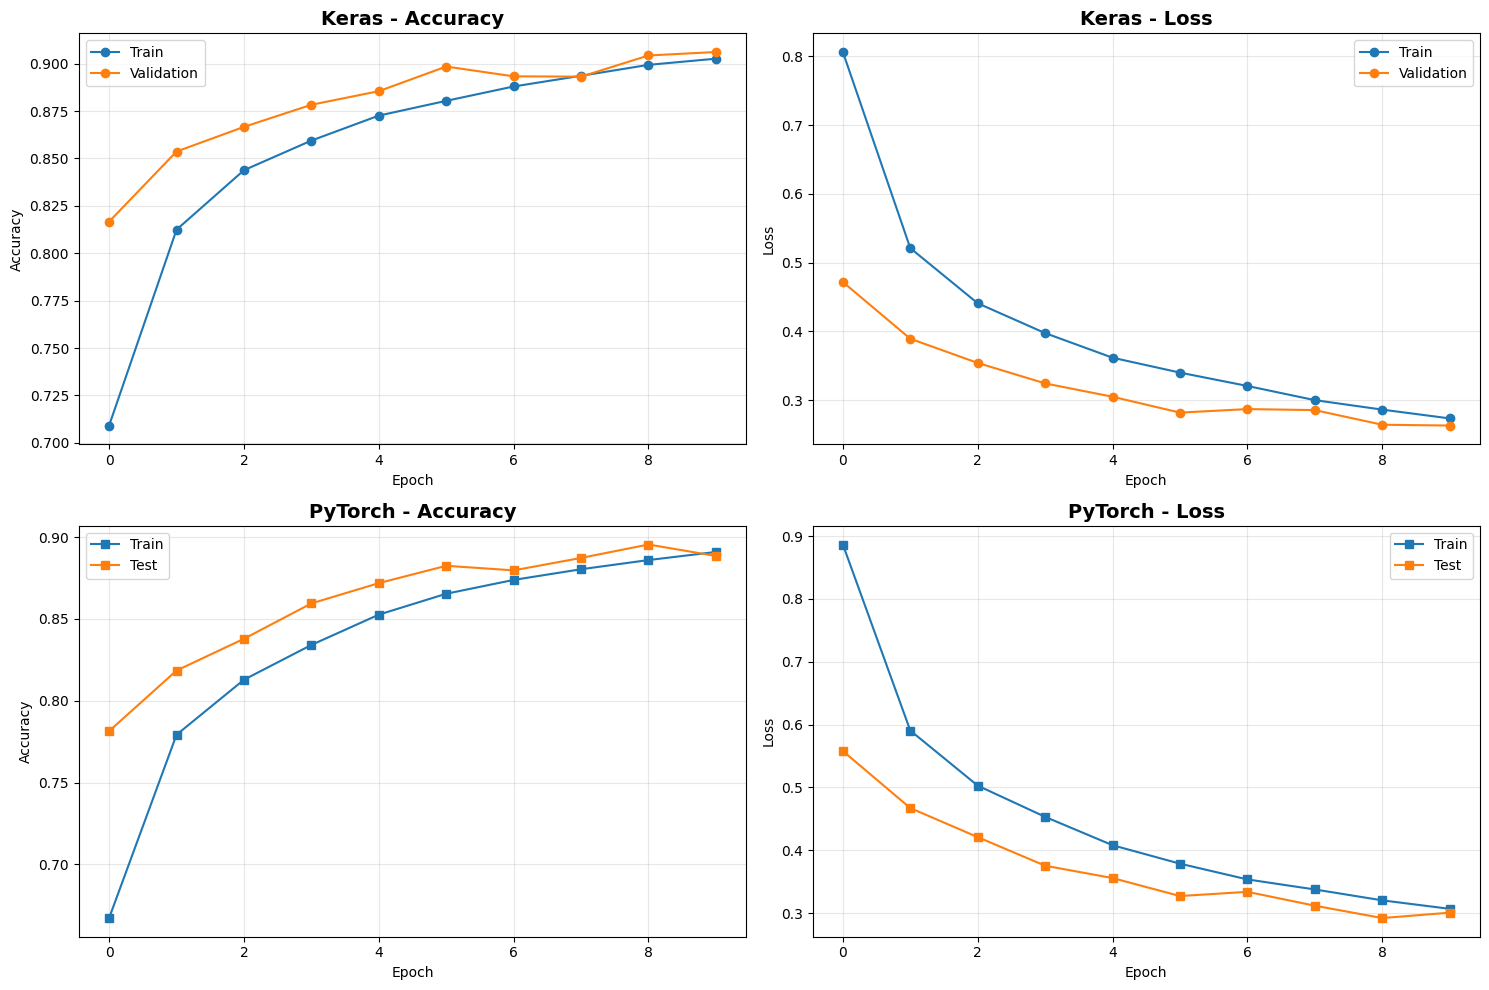

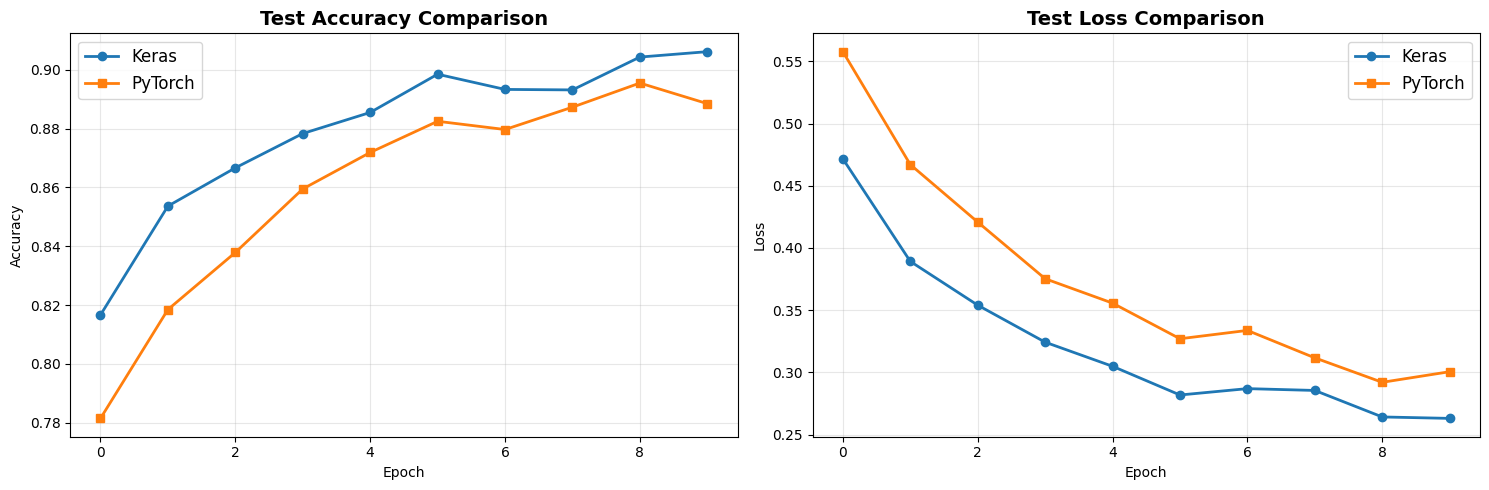


TRAINING COMPLETE - Both models trained and compared successfully!


In [14]:
# ============================================================================
# COMPARISON RESULTS
# ============================================================================
print("\n" + "=" * 80)
print("COMPARISON RESULTS")
print("=" * 80)
print(f"\n{'Metric':<30} {'Keras':<20} {'PyTorch':<20}")
print("-" * 70)
print(f"{'Test Accuracy':<30} {keras_test_acc*100:.2f}%{'':<14} {pytorch_test_acc:.2f}%")
print(f"{'Training Time (seconds)':<30} {keras_train_time:.2f}{'':<16} {pytorch_train_time:.2f}")
print(f"{'Time per Epoch (seconds)':<30} {keras_train_time/10:.2f}{'':<16} {pytorch_train_time/10:.2f}")

# ============================================================================
# VISUALIZATION
# ============================================================================
print("\n[6] Generating comparison plots...")

# Convert PyTorch accuracies to match Keras format (0-1 scale)
pytorch_train_accs_scaled = [acc/100 for acc in pytorch_train_accs]
pytorch_test_accs_scaled = [acc/100 for acc in pytorch_test_accs]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Keras Training History
axes[0, 0].plot(keras_history.history['accuracy'], label='Train', marker='o')
axes[0, 0].plot(keras_history.history['val_accuracy'], label='Validation', marker='o')
axes[0, 0].set_title('Keras - Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(keras_history.history['loss'], label='Train', marker='o')
axes[0, 1].plot(keras_history.history['val_loss'], label='Validation', marker='o')
axes[0, 1].set_title('Keras - Loss', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# PyTorch Training History
axes[1, 0].plot(pytorch_train_accs_scaled, label='Train', marker='s')
axes[1, 0].plot(pytorch_test_accs_scaled, label='Test', marker='s')
axes[1, 0].set_title('PyTorch - Accuracy', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(pytorch_train_losses, label='Train', marker='s')
axes[1, 1].plot(pytorch_test_losses, label='Test', marker='s')
axes[1, 1].set_title('PyTorch - Loss', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('keras_vs_pytorch_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy Comparison
axes[0].plot(keras_history.history['val_accuracy'], label='Keras', marker='o', linewidth=2)
axes[0].plot(pytorch_test_accs_scaled, label='PyTorch', marker='s', linewidth=2)
axes[0].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)

# Loss Comparison
axes[1].plot(keras_history.history['val_loss'], label='Keras', marker='o', linewidth=2)
axes[1].plot(pytorch_test_losses, label='PyTorch', marker='s', linewidth=2)
axes[1].set_title('Test Loss Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('direct_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
print("TRAINING COMPLETE - Both models trained and compared successfully!")
print("=" * 80)